# Probability and Information Theory

## Steps

1. Understand the problem and the mathematical model and generate data
2. Load the (generated) data and get an overview
3. Try to fit parametric probability distributions
4. Joint  and conditional probabilities, chain rule and Bayes' Theorem
5. Self-entropy of an event and entropy of a distribution

## Understand the problem and the mathematical model and generate data

From [1] we learned the following simplified model for simulating and understanding the spreading of diseases. 

![Epidemic process](img/epidemic_process.png)

A fraction of $\beta$ of the susceptible indivisuals $S$ gets infected each unit of time, say each day. A fraction $\mu$ of the infected recover. A simple generalization is a third parameter $\nu$ and the assumption that only $\nu\mu$ individuals recover, while ${1-\nu}\mu$ individuals die.

This leads to the following system of ordinary differencial equations (ODEs):

\begin{align}
\frac{\delta S}{\delta t} & = -\beta S(t)I(t)\\
\frac{\delta I}{\delta t} & = \beta S(t)I(t) -\mu I(t)\\
\frac{\delta R}{\delta t} & = \nu\mu I(t)\\
\frac{\delta D}{\delta t} & = (1-\nu)\mu I(t)
\end{align}

Given starting values of $S(0)=99, I(0)=1, R(0)=D(0)=0$ and parameter values for $\beta=0.05\%, \mu=1.75\%, \nu=99\%$, we can simulate this system of ODEs.

In `Matlab`, we use the ordinary differencial equation solver `ode45`.

In [83]:

"""
%%file virusSpreading.m
function res = virusSpreading(t, y, beta, mu, nu)
    S=y(1);
    I=y(2);
    R=y(3);
    D=y(4);
    
    res(1,1)=-beta*S*I;
    res(2,1)=beta*S*I-mu*I;
    res(3,1)=nu*mu*I;
    res(4,1)=(1-nu)*mu*I;
end
"""

import pandas as pd
import numpy as np
import scipy.stats as st

def virusSpreading(t, y, beta, mu, nu):
    
    S = y[0]
    I = y[1]
    R = y[2]
    D = y[3]
    
    res = np.zeros([4], dtype="float32")
    
    res[0] = (-beta * S * I)
    res[1] = (beta * S * I-mu * I)
    res[2] = (nu * mu * I)
    res[3] = ((1-nu) * mu * I)
    
    return res


In [112]:
"""
%%file simVirusSpreading.m
function res = simVirusSpreading(beta, verbose)
    S0 =99;
    I0 =1;
    R0 = 0;
    D0 = 0;
    y0 = [S0, I0, R0, D0]';
    t_span = [0 500];
    mu = 0.0175;
    nu = 0.99;
    [tSol, ySol] = ode45(@(t,y) virusSpreading(t, y, beta, mu, nu), t_span, y0);
    if verbose
        plot(tSol, ySol);
        legend("Susceptible","Infected","Recovered","Dead");
    end
    res = [tSol, ySol];
end
"""

from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def simVirusSpreading(beta, verbose):
    S0 = 99
    I0 = 1
    R0 = 0
    D0 = 0
    
    y0 = np.array([S0, I0, R0, D0], dtype='float32')
    
    t_span = np.array([0, 500], dtype='float32')
    mu = 0.0175
    nu = 0.99
    sol = solve_ivp(lambda t, y: virusSpreading(t, y, beta, mu, nu), t_span, y0);
    
    tSol = sol.t
    ySol = sol.y
    
    if verbose:
        plt.plot(tSol, ySol[0])
        plt.plot(tSol, ySol[1])
        plt.plot(tSol, ySol[2])
        plt.plot(tSol, ySol[3])
        plt.legend(["Susceptible","Infected","Recovered","Dead"])
    
    res = np.array([tSol, ySol])
    
    return res
    
    

C:\Users\fdai3744\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


array([array([0.00000000e+00, 6.49331942e-02, 7.14265137e-01, 7.20758456e+00,
       3.30867163e+01, 7.11052481e+01, 1.22380109e+02, 1.77921059e+02,
       2.34520093e+02, 3.00047943e+02, 3.81599485e+02, 4.60962417e+02,
       5.00000000e+02]),
       array([[9.90000000e+01, 9.89967825e+01, 9.89642433e+01, 9.85996346e+01,
        9.61513905e+01, 8.71087197e+01, 5.85830451e+01, 2.73841426e+01,
        1.41661736e+01, 9.34287961e+00, 7.61284114e+00, 7.12142742e+00,
        7.02272078e+00],
       [1.00000000e+00, 1.00207997e+00, 1.02311319e+00, 1.25853510e+00,
        2.82676890e+00, 8.41346002e+00, 2.30783731e+01, 2.77864294e+01,
        1.79915018e+01, 8.27919715e+00, 2.77932709e+00, 9.27521293e-01,
        5.37711398e-01],
       [0.00000000e+00, 1.12613718e-03, 1.25171211e-02, 1.40412019e-01,
        1.01162216e+00, 4.43304218e+00, 1.81551969e+01, 4.43811340e+01,
        6.71639005e+01, 8.15541433e+01, 8.87117529e+01, 9.10315402e+01,
        9.15151716e+01],
       [0.00000000e+00, 1

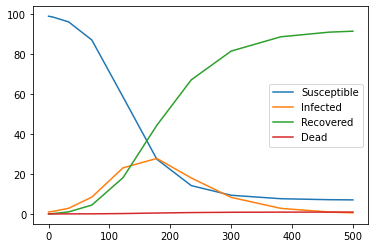

In [113]:
"""
format compact
beta = 0.0005; %0.05%
simVirusSpreading(beta, true);
"""

beta = 0.0005

simVirusSpreading(beta, True)

Note that the development highly depends on the parameter $\beta$. So, if all behave well, the infection risk drops and the infection spreading slows down. Inversely, if we misbehave and increase the risk of infection, the infection spreads faster. Here simulations with $\beta = 0.03\%$ and $\beta = 0.07\%$, respectively.

C:\Users\fdai3744\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


array([array([0.00000000e+00, 6.49332131e-02, 7.14265344e-01, 7.20758666e+00,
       6.31546912e+01, 1.60343400e+02, 3.22154132e+02, 4.71637154e+02,
       5.00000000e+02]),
       array([[9.90000000e+01, 9.89980707e+01, 9.89786959e+01, 9.87765116e+01,
        9.62376263e+01, 8.64477487e+01, 5.58197358e+01, 3.79241772e+01,
        3.62200953e+01],
       [1.00000000e+00, 1.00079248e+00, 1.00874982e+00, 1.09165443e+00,
        2.11158663e+00, 5.64494814e+00, 1.07387481e+01, 5.90028786e+00,
        4.92250957e+00],
       [0.00000000e+00, 1.12541363e-03, 1.24287116e-02, 1.30515575e-01,
        1.63427936e+00, 7.82823039e+00, 3.31070992e+01, 5.56137785e+01,
        5.82688200e+01],
       [0.00000000e+00, 1.13678145e-05, 1.25542534e-04, 1.31833914e-03,
        1.65078709e-02, 7.90730354e-02, 3.34415164e-01, 5.61755345e-01,
        5.88573947e-01]])], dtype=object)

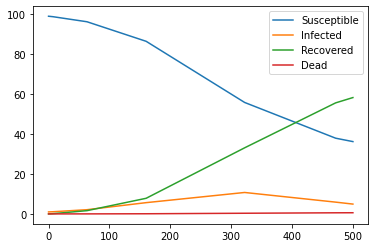

In [114]:
"""
beta = 0.0003;
simVirusSpreading(beta, true);
"""
beta = 0.0003

simVirusSpreading(beta, True)

C:\Users\fdai3744\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


array([array([0.00000000e+00, 6.49331584e-02, 7.14264743e-01, 7.20758058e+00,
       2.50359426e+01, 4.95484070e+01, 8.16423268e+01, 1.16210651e+02,
       1.52365524e+02, 1.93462985e+02, 2.46219928e+02, 3.08575813e+02,
       3.70931698e+02, 4.33666215e+02, 4.95887672e+02, 5.00000000e+02]),
       array([[9.90000000e+01, 9.89954927e+01, 9.89495874e+01, 9.83966511e+01,
        9.55403651e+01, 8.50987666e+01, 5.34812252e+01, 2.12804901e+01,
        8.45924085e+00, 4.26719775e+00, 2.72917469e+00, 2.19528805e+00,
        2.02437634e+00, 1.96467955e+00, 1.94346618e+00, 1.94268119e+00],
       [1.00000000e+00, 1.00336910e+00, 1.03767889e+00, 1.45052193e+00,
        3.57038275e+00, 1.11195391e+01, 3.11488492e+01, 4.03871480e+01,
        3.03847605e+01, 1.75819044e+01, 7.89618718e+00, 2.94516709e+00,
        1.08462643e+00, 3.95324303e-01, 1.45051765e-01, 1.35736883e-01],
       [0.00000000e+00, 1.12686101e-03, 1.26063575e-02, 1.51298727e-01,
        8.80359585e-01, 3.74387724e+00, 1.52162255

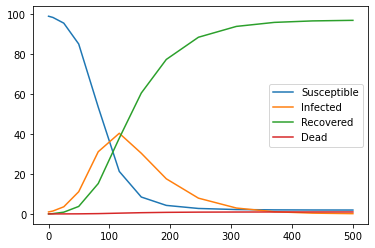

In [115]:
"""
beta = 0.0007;
simVirusSpreading(beta, true);
"""

beta = 0.0007

simVirusSpreading(beta, True)

Of course, the exact parameters values for $\beta, \mu, \nu$ are not known but can only be approximated from observations. The ODE model is an abstraction of the real process, which depends on deterministic but unknown variables and randomness. Therefore, it makes sense to understand disease spreading as a **random process.**

We will generate some observations from this process from different countries and then forget about the process and only work with the observations.

Therefore, we assume that $\beta$ distributes normally around a mean of $\bar \beta = 0.05\%$ with a standard deviation of $\sigma = 0.01\%$. We generate the data for $50$ countries. However, we are only "observing" $8$ new features.

1. The numbers $N_{50}, N_{150}, N_{300}$ of infected after $50, 150, 300$ days, resp. 
2. The corresponding numbers of new infections on that day $D_{50}, D_{150}, D_{300}$.
3. The time $T_{peak}$ to peak infection.
4. The total number of casulties $X_{500}$ after $500$ days.

In [145]:
"""
countries = 150;
verbose = false;
export_raw_data = true;
if verbose
    countries=1;
end
if export_raw_data
    raw_features = zeros(4*countries, 501);
    raw_features(1,:) = 1:501;
end
features = zeros(countries,8);
rng('default')  % For reproducibility
betas = normrnd(0.0005,0.0001,[1,countries]);
for i=1:countries
    res = simVirusSpreading(betas(i), false);
    times = res(:,1);
    % Add randomness to the observations
    rand_res = zeros(size(res,1),5);
    rand_res(:,1) = times;
    for j=2:5
        rand_res(:,j) = arrayfun(@(x) normrnd(0,0.025*x)+x, res(:,j));
    end
    if verbose
        fprintf("Beta = %.3f%%\n",betas(1)*100);
        plot(times,[res(:,2) rand_res(:,2), res(:,3) rand_res(:,3),res(:,4) rand_res(:,4),res(:,5) rand_res(:,5)]);        
    end
    if export_raw_data
        days = [0:500];
        for var = 2:5
            F = griddedInterpolant(rand_res(:,1),rand_res(:,var));
            raw_features((i-1)*4+var,:)=F(days);
        end
    end
    ti = times(times<=50);
    n_50 = rand_res(length(ti),3);
    d_50 = rand_res(length(ti),3) - rand_res(length(ti)-1,3);
    ti = times(times<=150);
    n_150 = rand_res(length(ti),3);
    d_150 = rand_res(length(ti),3) - rand_res(length(ti)-1,3);
    ti = times(times<=300);
    n_300 = rand_res(length(ti),3);
    d_300 = rand_res(length(ti),3) - rand_res(length(ti)-1,3);
    [M,ii] = max(rand_res(:,3));
    t_peak = times(ii);
    if verbose
        fprintf("n_50=%.4f, n_150=%.4f, n_300=%.4f\nd_50=%.4f, d_150=%.4f, d_300=%.4f\nt_peak=%.4f\nx_500=%.4f\n",n_50, n_150, n_300, d_50, d_150, d_300, t_peak, rand_res(end,5) );
    end
    features(i,:)=[n_50, n_150, n_300, d_50, d_150, d_300, t_peak, rand_res(end,5)];
end
writematrix(features,'../2020 DL data/epidemic_process.csv');
if export_raw_data
    writematrix(raw_features,'../2020 DL data/epidemic_process_raw_data.csv');
end
"""

from scipy.interpolate import RegularGridInterpolator

countries = 150
verbose = False
export_raw_data = True

if verbose:
    countries = 1
    
if export_raw_data:
    raw_features = np.zeros([4 * countries, 501])
    raw_features[0,:] = np.arange(1, 502)

features = np.zeros([countries, 8])
betas = np.random.default_rng().normal(0.0005, 0.0001, [1, countries])

for i in range(0, countries):
    res = simVirusSpreading(betas[0][i], False)
    times = res[:,0]
    rand_res = np.zeros([res.shape[0], 5])
    print(rand_res.shape)
    rand_res[0] = times[:,0]
   
    for j in range(1, 5):
        rand_res[:,j] = (lambda x: normrnd(0,0.025*x)+x, res[:,j]);
        #[tSol, ySol] = ode45(@(t,y) virusSpreading(t, y, beta, mu, nu), t_span, y0);
        #sol = solve_ivp(lambda t, y: virusSpreading(t, y, beta, mu, nu), t_span, y0);
        ##rand_res(:,j) = arrayfun(@(x) normrnd(0,0.025*x)+x, res(:,j));
        
    
    if verbose:
        ##fprintf("Beta = %.3f%%\n",betas(1)*100);
        plt.plot(times,[res[:,1], rand_res[:,1], res[:,2], rand_res[:,2],res[:,3], rand_res[:,3],res[:,4], rand_res[:,4]]); 

    if export_raw_data:
        days = np.arange(0, 501)
        
        for var in range(1,5):
            F = RegularGridInterpolator(rand_res[:,0], rand_res[:,var])
            raw_features[(i-1)*4+var,:] = F[days]
            
    ti = times[times<=50]
    n_50 = rand_res[(ti.shape[0] if ti.shape[0] >= ti.shape[1] else ti.shape[1]), 2]
#   d_50 = rand_res(length(ti),3) - rand_res(length(ti)-1,3);

    d_50 = rand_res[(ti.shape[0] if ti.shape[0] >= ti.shape[1] else ti.shape[1]), 2] - rand_res[ti.shape[0] if ti.shape[0] >= ti.shape[1] else ti.shape[1] -1, 3]
    ti = times[times<=150]
    n_150 = rand_res[(ti.shape[0] if ti.shape[0] >= ti.shape[1] else ti.shape[1]), 2]
    d_150 = rand_res[(ti.shape[0] if ti.shape[0] >= ti.shape[1] else ti.shape[1]), 2] - rand_res[(ti.shape[0] if ti.shape[0] >= ti.shape[1] else ti.shape[1])-1, 3]
    ti = times[times<=300]
    n_300 = rand_res[(ti.shape[0] if ti.shape[0] >= ti.shape[1] else ti.shape[1]), 2]
    d_300 = rand_res[ti.shape[0] if ti.shape[0] >= ti.shape[1] else ti.shape[1], 2] - rand_res[(ti.shape[0] if ti.shape[0] >= ti.shape[1] else ti.shape[1]) -1, 3]

    M, ii = rand_res[:, 2].max(axis=0)
    t_peak = times[ii]
    
    if verbose:                                                                                                 
        ##fprintf("n_50=%.4f, n_150=%.4f, n_300=%.4f\nd_50=%.4f, d_150=%.4f, d_300=%.4f\nt_peak=%.4f\nx_500=%.4f\n",n_50, n_150, n_300, d_50, d_150, d_300, t_peak, rand_res(end,5) );    
        continue
    features[i,:] = [n_50, n_150, n_300, d_50, d_150, d_300, t_peak, rand_res[end,4]]

np.savetxt("../epidemic_process.csv", features, delimiter=",")

if export_raw_data:
    np.savetxt("../epidemic_process.csv", raw_features, delimiter=",")

C:\Users\fdai3744\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

## Load the (generated) data and get an overview

This is your starting point. Load the observation data.

In [38]:
"""
features = csvread('../2020 DL data/epidemic_process.csv');
"""

data = pd.read_csv('../epidemic_process.csv')
features = np.zeros([data.shape[0] + 1, data.shape[1]])

for i in range(0, data.shape[1]):
    features[0][i] = float(data.keys()[i])

nmatrix = data.to_numpy()
features[1:,:] = nmatrix



Plot the emperical **cumulative probability distributions** (CDFs) of the **random variables** (features).

Text(0, 0.5, 'F(x)')

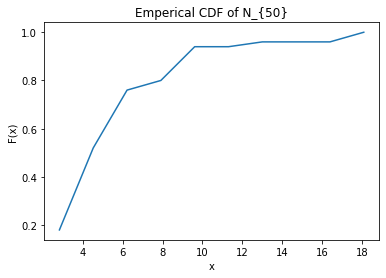

In [40]:
#[h,stats] = cdfplot(features(:,1));
#title("Emperical CDF of N_{50}")
#stats

hist, bins_edges = np.histogram(features[:,0])
pdf = hist / sum(hist)
cdf = np.cumsum(pdf)
plt.plot(bins_edges[1:], cdf)
plt.title("Emperical CDF of N_{50}")
plt.xlabel("x")
plt.ylabel("F(x)")

Text(0, 0.5, 'F(x)')

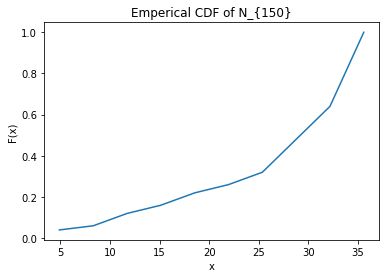

In [29]:
#[h,stats] = cdfplot(features(:,2));
#title("Emperical CDF of N_{150}")
#stats

hist, bins_edges = np.histogram(features[:,1])
pdf = hist / sum(hist)
cdf = np.cumsum(pdf)
plt.plot(bins_edges[1:], cdf)
plt.title("Emperical CDF of N_{150}")
plt.xlabel("x")
plt.ylabel("F(x)")

Text(0, 0.5, 'F(x)')

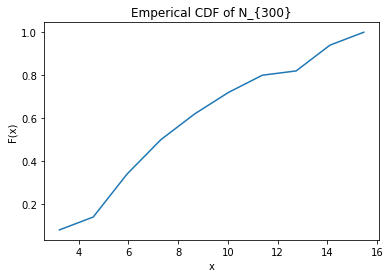

In [30]:
#[h,stats] = cdfplot(features(:,3));
#title("Emperical CDF of N_{300}")
#stats

hist, bins_edges = np.histogram(features[:,2])
pdf = hist / sum(hist)
cdf = np.cumsum(pdf)
plt.plot(bins_edges[1:], cdf)
plt.title("Emperical CDF of N_{300}")
plt.xlabel("x")
plt.ylabel("F(x)")

Text(0, 0.5, 'F(x)')

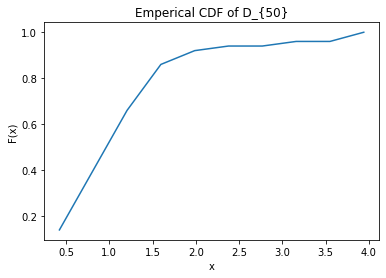

In [31]:
#[h,stats] = cdfplot(features(:,4));
#title("Emperical CDF of D_{50}")
#stats

hist, bins_edges = np.histogram(features[:,3])
pdf = hist / sum(hist)
cdf = np.cumsum(pdf)
plt.plot(bins_edges[1:], cdf)
plt.title("Emperical CDF of D_{50}")
plt.xlabel("x")
plt.ylabel("F(x)")

Text(0, 0.5, 'F(x)')

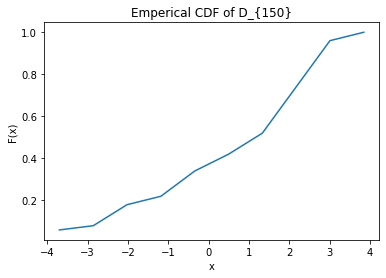

In [32]:
#[h,stats] = cdfplot(features(:,5));
#title("Emperical CDF of D_{150}")
#stats

hist, bins_edges = np.histogram(features[:,4])
pdf = hist / sum(hist)
cdf = np.cumsum(pdf)
plt.plot(bins_edges[1:], cdf)
plt.title("Emperical CDF of D_{150}")
plt.xlabel("x")
plt.ylabel("F(x)")

Text(0, 0.5, 'F(x)')

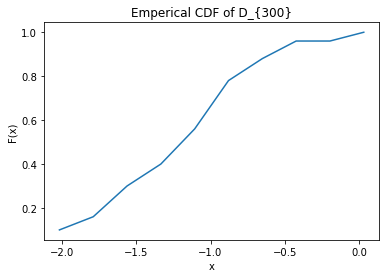

In [33]:
#[h,stats] = cdfplot(features(:,6));
#title("Emperical CDF of D_{300}")
#stats

hist, bins_edges = np.histogram(features[:,5])
pdf = hist / sum(hist)
cdf = np.cumsum(pdf)
plt.plot(bins_edges[1:], cdf)
plt.title("Emperical CDF of D_{300}")
plt.xlabel("x")
plt.ylabel("F(x)")

Text(0, 0.5, 'F(x)')

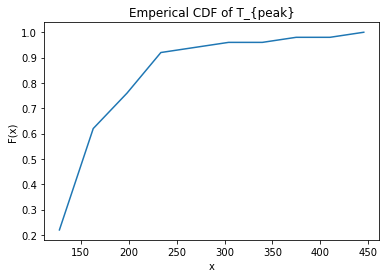

In [34]:
#[h,stats] = cdfplot(features(:,7));
#title("Emperical CDF of T_{peak}")
#stats

hist, bins_edges = np.histogram(features[:,6])
pdf = hist / sum(hist)
cdf = np.cumsum(pdf)
plt.plot(bins_edges[1:], cdf)
plt.title("Emperical CDF of T_{peak}")
plt.xlabel("x")
plt.ylabel("F(x)")

Text(0, 0.5, 'F(x)')

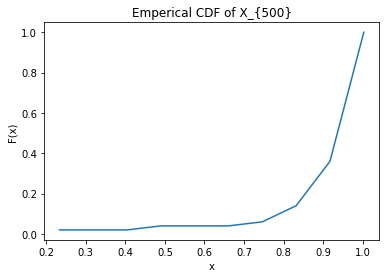

In [36]:
#[h,stats] = cdfplot(features(:,8));
#title("Emperical CDF of X_{500}")
#stats

hist, bins_edges = np.histogram(features[:,7])
pdf = hist / sum(hist)
cdf = np.cumsum(pdf)
plt.plot(bins_edges[1:], cdf)
plt.title("Emperical CDF of X_{500}")
plt.xlabel("x")
plt.ylabel("F(x)")

Recall, the sample `mean` value is an approximation of the expected value, or **expectation** of the random variable. The sample **variance** is the square of the sample standard deviation `std`.    

Check the correlation between the features.

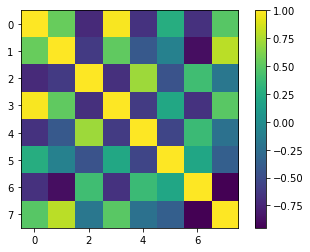

In [37]:
"""
rho = corrcoef(features);
imagesc(rho, [-1 1]);
colorbar;
"""

rho = np.corrcoef(features, rowvar=False)
correlation = plt.imshow(rho)
plt.colorbar(correlation)
plt.show();

Recall, the (sample) correlation of two (samples of) random variables $X$ and $Y$ their (sample) **covariance** normalized (divided) by the product of their (sample) standard deviation.

*Discuss your findings. Your answer goes here.*

## Try to fit parametric probability distributions

We go through a set of common probability distributions and try to fit any of them  to the data. We use the Chi-square and the Kolmogorov-Smirnov tests to check the goodness of fit. 

*Note that fitting and testing using the same data is actually not quite correct. We should use cross-validation.*

In [146]:
import scipy.stats
import scipy
from sklearn.preprocessing import StandardScaler


def distribution_fitting(feature):
        distnames = ["Poisson", "Exponential", "Gamma", "ExtremeValue", "Kernel"]
        values_must_be_positive = ["Poisson", "Exponential", "Gamma"]
        x = feature
        x_values = np.linspace(np.min(x), np.max(x))
        
        for dn in distnames:
            distname = getattr(scipy.stats, dn)
            probDist = distname.fit(x.T)
            
            res1= scipy.stats.kstest(x, dn, args=param)[1]
            
"""
%%file distribution_fitting.m
function pd = distribution_fitting(feature)
    distnames =["Poisson", "Exponential", "Gamma", "ExtremeValue", "Kernel"];    
    values_must_be_positive =["Poisson", "Exponential", "Gamma"];
    x=feature.';
    x_values = linspace(min(x),max(x));
    for dn=distnames
        if min(x)<0 & ~isempty(find(strcmp(dn, values_must_be_positive)))
          continue;
        end
        distname = char(dn);
        pd = fitdist(x.',distname);
        res1=kstest(x, 'CDF', pd); 
        res2=chi2gof(x, 'CDF', pd);
        if (~res1 && ~res2)
            fprintf('%s with 5%% significance level\r',distname);
            cdfplot(x)
            hold on
            plot(x_values,cdf(pd,x_values),'r-')
            plot(x_values,pdf(pd,x_values),'g-')
            legend('Empirical CDF',[distname ' CDF'],[distname ' PDF'],'Location','best');
            %title(['Empirical CDF and ', [distname ' CDF/PDF']);
            hold off 
            return;
        else 
            fprintf('Not %s with 5%% significance level\n',distname);
        end
    end
end
"""

SyntaxError: invalid syntax (<ipython-input-146-56f029695c65>, line 8)

In [155]:
#pd_n_50 = distribution_fitting(features(:,1))

pd_n_50 = distribution_fitting(features[:,0])

NameError: name 'distribution_fitting' is not defined

Not Poisson with 5% significance level
Not Exponential with 5% significance level
Not Gamma with 5% significance level
pd_n_150 = 
  ExtremeValueDistribution

  Extreme Value distribution
       mu = 30.1544   [28.3336, 31.9751]
    sigma = 6.28696   [4.9552, 7.97664]




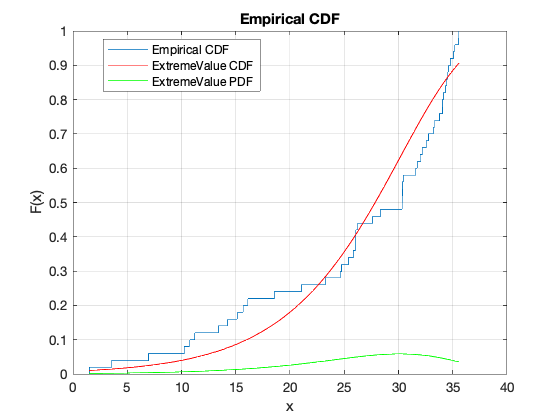

In [19]:
#pd_n_150 = distribution_fitting(features(:,2))

pd_n_150 = distribution_fitting(features[:,1])

Not Poisson with 5% significance level
Not Exponential with 5% significance level
pd_n_300 = 
  GammaDistribution

  Gamma distribution
    a = 4.59304   [3.14535, 6.70704]
    b = 1.77341   [1.18864, 2.64587]




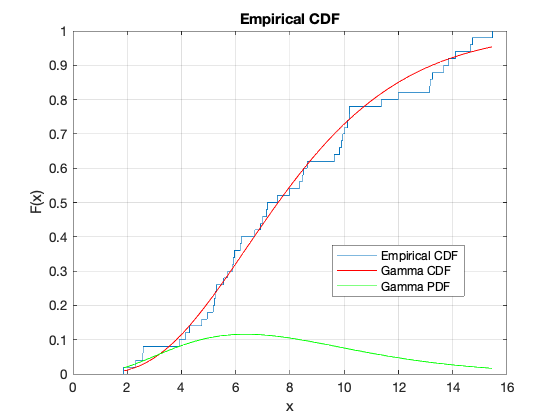

In [20]:
#pd_n_300 = distribution_fitting(features(:,3))
pd_n_300 = distribution_fitting(features[:,2])

Not Poisson with 5% significance level
Not Exponential with 5% significance level
pd_d_50 = 
  GammaDistribution

  Gamma distribution
    a =  2.10901   [1.46371, 3.0388]
    b = 0.520437   [0.344661, 0.785857]




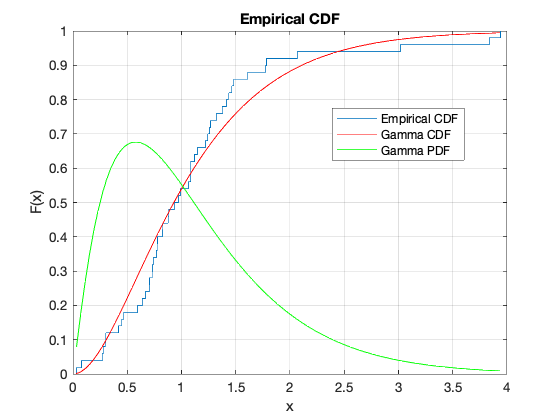

In [21]:
#pd_d_50 = distribution_fitting(features(:,4))
pd_d_50 = distribution_fitting(features[:,3])

pd_d_150 = 
  ExtremeValueDistribution

  Extreme Value distribution
       mu = 1.49958   [1.01953, 1.97964]
    sigma = 1.64835   [1.31672, 2.06349]




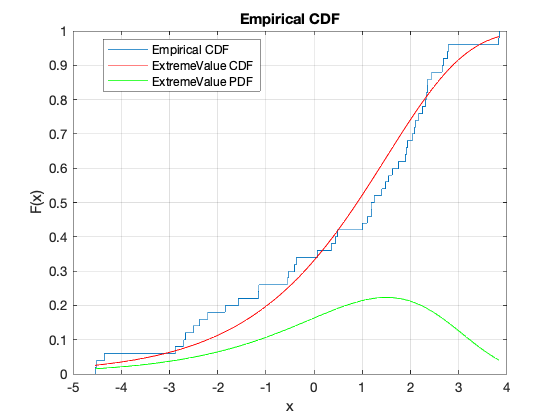

In [22]:
#pd_d_150 = distribution_fitting(features(:,5))
pd_d_150 = distribution_fitting(features[:,4])

pd_d_300 = 
  ExtremeValueDistribution

  Extreme Value distribution
       mu = -0.978194   [-1.13856, -0.817826]
    sigma =   0.54497   [0.44751, 0.663654]




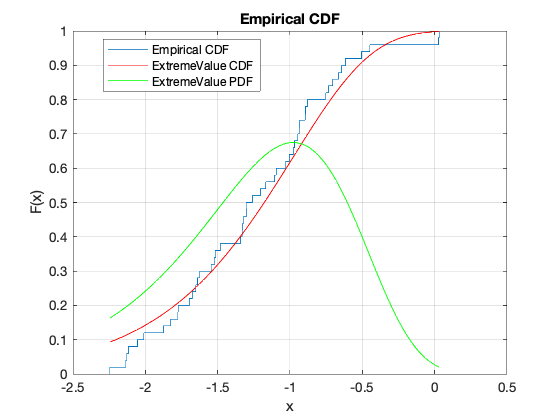

In [23]:
#pd_d_300 = distribution_fitting(features(:,6))
pd_d_300 = distribution_fitting(features[:,5])

Not Poisson with 5% significance level
Not Exponential with 5% significance level
pd_t_peak = 
  GammaDistribution

  Gamma distribution
    a = 9.73574   [6.62162, 14.3144]
    b = 17.1703   [11.5607, 25.5018]




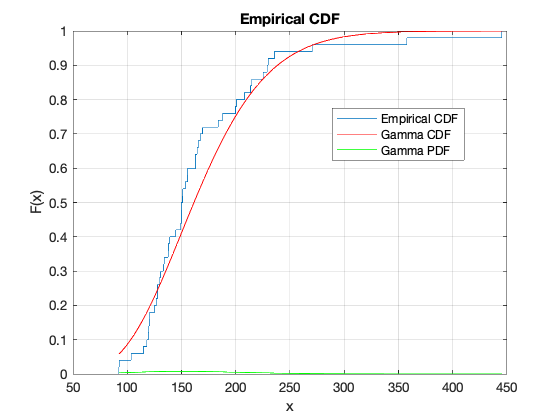

In [24]:
#pd_t_peak = distribution_fitting(features(:,7))
pd_t_peak = distribution_fitting(features[:,6])

Not Poisson with 5% significance level
Not Exponential with 5% significance level
Not Gamma with 5% significance level
pd_x_500 = 
  ExtremeValueDistribution

  Extreme Value distribution
       mu = 0.943569   [0.925829, 0.961309]
    sigma = 0.062171   [0.0487856, 0.0792289]




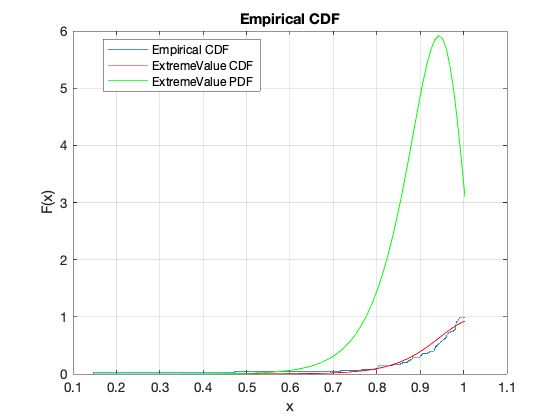

In [25]:
#pd_x_500 = distribution_fitting(features(:,8))
pd_x_500 = distribution_fitting(features[:,7])

*Describe the fitted distributions. Your answer goes here.*

## Joint  and conditional probabilities, chain rule and Bayes' Theorem

Lets calculate the probability of having a mild start and a disastrous end of the epidemia. We translate that to the **joint probability** that no more than $4\%$ are infected after $50$ days, i.e., $N_{50}\leq 4\%$ and more than $0.95\%$ die in the end, i.e., $X_{500}>0.95\%$.

In [151]:
n_50 = features[:,0]
x_500 = features[:,7]

fit1 =

length = set((n_50.where(n_50 <= 4))).intersection(n_50.where(x_500 > 0.95))
positive_cases = (length.shape[0] if length.shape[0] >= length.shape[1] else length.shape[1])
all_cases = (features.shape[0] if features.shape[0] >= features.shape[1] else features.shape[1])
P = positive_cases/all_cases

#n_50 = features(:,1);
#x_500 = features(:,8);
#positive_cases = length(intersect(find(n_50<=4),find(x_500>0.95)))
#all_cases = length(features);
#P = positive_cases/all_cases

AttributeError: 'numpy.ndarray' object has no attribute 'where'

So $P(N_{50}\leq 4\%, X_{500}>0.95\%) \approx 0.02$.

We check the product of the two probabilities $P(N_{50}\leq 4\%)P(X_{500}>0.95\%)$:

In [27]:
length = (find(n_50<=4))/all_cases * length(find(x_500>0.95))/all_cases
P2 = (length.shape[0] if length.shape[0] >= length.shape[1] else length.shape[1])
#P2 = length(find(n_50<=4))/all_cases * length(find(x_500>0.95))/all_cases

P2 =
    0.1428



We are not surprised that the result is different from the joint probability as the random variables $N_{50}$ and $X_{500}$ not independent (double-check the results from the correlation analysis).  

What is the **conditional probability** of more than $0.95\%$ die in the end given that we know that no more $4\%$ are infected after $50$ days.

In [28]:
length = find(n_50<=4))
mild_start_cases = (length.shape[0] if length.shape[0] >= length.shape[1] else length.shape[1])
P_AB = positive_cases/mild_start_cases

#mild_start_cases = length(find(n_50<=4));
#P_AB = positive_cases/mild_start_cases

P_AB =
    0.0588



So $P(X_{500}>0.95\%|N_{50}\leq 4\%) \approx 0.0588$.

The product or **chain rule** of probability states that

\begin{align}
P(A,B) &= P(A|B)P(B)\\
P(X_{500}>0.95\%,N_{50}\leq 4\%) &= P(X_{500}>0.95\%|N_{50}\leq 4\%)P(N_{50}\leq 4\%)
\end{align}

And we don't get disappointed:

In [29]:
P_B = mild_start_cases/all_cases
P = P_AB*P_B

P =
    0.0200



Let us numerically confirm **Bayes' Theorem** for this case. We'd expect that  

\begin{align}
P(A|B) &= \frac{P(B|A)P(A)}{P(B)}\\
P(X_{500}>0.95\%|N_{50}\leq 4\%) &= \frac{P(N_{50}\leq 4\%|X_{500}>0.95\%)P(X_{500}>0.95\%)}{P(N_{50}\leq 4\%)}
\end{align}

And we don't get disappointed:

In [30]:
length = (find(x_500>0.95))

disaster_cases = (length.shape[0] if length.shape[0] >= length.shape[1] else length.shape[1])
P_A = disaster_cases / all_cases
P_BA = positive_cases / disaster_cases
P_AB = P_BA * P_A / P_B

#disaster_cases = length(find(x_500>0.95));
#P_A = disaster_cases/all_cases;
#P_BA = positive_cases/disaster_cases;
#P_AB = P_BA*P_A/P_B

P_AB =
    0.0588



So far, we have looked at the joint (sample) probability of $P(N_{50}\leq n, X_{500}>x)$ for *concrete* bounds $n=4$ and $x=0.95$. Let us now understand the joint (sample) probability of $F(n,x)=P(N_{50}\leq n, X_{500}>x)$ as a *function* of these bounds $n$ and $x$. Since, $0\leq X_{500}\leq 100$ this function is equal to joint (sample) cumulative distribution function: 

\begin{align}
F(n,x) &=\mathit{CDF}_{N_{50},100-X_{500}}(n,100-x)\\
\mathit{CDF}_{N_{50},100-X_{500}}(n,y)&=P(N_{50}\leq n, 100-X_{500}\leq y)
\end{align}

In `Matlab`, we can numerically approximate such a joint $\mathit{CDF}_{X,Y}(x,y)$:

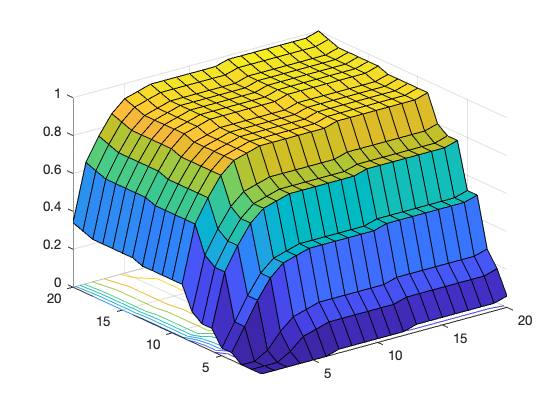

In [31]:

joint_CDF=ecdfbiv([n_50, 100-x_500],20,20);
surfc([1:20],[1:20],joint_CDF);

#addpath('/Users/wlomsi/Documents/MATLAB/ecdfbiv');
#joint_CDF=ecdfbiv([n_50, 100-x_500],20,20);
#surfc([1:20],[1:20],joint_CDF);

*Interprete this CDF. Your answer goes here.*

Finally, we compare the emperical PDF the (sample) distribution with the fitted PDF of that distribution. We look at $N_{50}$.

In [4]:
from scipy import stats
from scipy.interpolate import griddata

def samplePDF(sample, pd_fit, verbose):
    kde = stats.gaussian_kde(sample)
    x = np.linspace(data.min(), data.max(), 100)
    f = kde(x)
    
    PDF = griddata(x, f)
    
    if verbose:
        plt.plot(x, PDF[x])
        plt.plot(x, PDF[x][f])
        
    return PDF
        

"""
%%file samplePDF.m
function PDF = samplePDF(sample, pd_fit, verbose)
    [f,xi] = ksdensity(sample); 
    PDF = griddedInterpolant(xi,f);
    if (verbose)
        figure
        plot(xi, PDF(xi));
        hold on;
        plot(xi, pdf(pd_fit,xi));
    end
end
"""

'\n%%file samplePDF.m\nfunction PDF = samplePDF(sample, pd_fit, verbose)\n    [f,xi] = ksdensity(sample); \n    PDF = griddedInterpolant(xi,f);\n    if (verbose)\n        figure\n        plot(xi, PDF(xi));\n        hold on;\n        plot(xi, pdf(pd_fit,xi));\n    end\nend\n'

In [5]:
PDF_n_50 = samplePDF(n_50,pd_n_50, true)

NameError: name 'n_50' is not defined

PDF_x_500 = 
  griddedInterpolant with properties:

            GridVectors: {[1x100 double]}
                 Values: [1x100 double]
                 Method: 'linear'
    ExtrapolationMethod: 'linear'



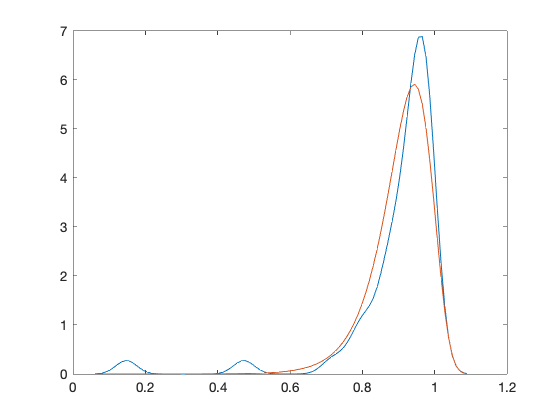

In [34]:
PDF_x_500 = samplePDF(x_500,pd_x_500, true)

## Self-entropy of an event and entropy of a distribution

We define a function that calculates the entropy of a sample distribution, based on a parameterless sample PDF approximation (calculated with `samplePDF`) and a well-known ditribition with fitted parameters (calculated with `distribution_fitting`). It also computeas the Kullback-Leibler (KL) divergence in both directions.

In [2]:
def fit_sample_entropies(sample, pd_fit, PDF):
    EntropyFitted = 0
    EntropySample = 0
    diff_fit_sample = 0
    diff_sample_fit = 0
    
    for i in range(0, (sample.shape[0] if sample.shape[0] >= sample.shape[1] else sample.shape[1])):
        EntropyFitted = EntropyFitted - pdf[pd_fit, sample[i]] * np.log(pdf[pd_fit, sample[i]])
        EntropySample = EntropySample - PDF[sample[i]] * np.log(PDF[sample[i]])
        diff_fit_sample = diff_fit_sample - pdf[pd_fit, sample[i]] * (np.log(pdf[pd_fit, sample[i]])-np.log(PDF[sample[i]]))
        diff_sample_fit = diff_sample_fit - PDF[sample[i]] * (np.log(pdf[pd_fit, sample[i]]) - np.log(PDF[sample[i]]));
    
    return EntropyFitted, EntropySample, diff_fit_sample, diff_sample_fit

"""
%%file fit_sample_entropies.m
function [EntropyFitted, EntropySample, diff_fit_sample, diff_sample_fit] = fit_sample_entropies(sample, pd_fit, PDF)
    EntropyFitted = 0;
    EntropySample = 0;
    diff_fit_sample = 0;
    diff_sample_fit = 0;
    for i=1:length(sample)
        EntropyFitted = EntropyFitted - pdf(pd_fit,sample(i))*log(pdf(pd_fit,sample(i)));
        EntropySample = EntropySample - PDF(sample(i))*log(PDF(sample(i)));
        diff_fit_sample = diff_fit_sample - pdf(pd_fit,sample(i))*(log(pdf(pd_fit,sample(i)))-log(PDF(sample(i))));
        diff_sample_fit = diff_sample_fit - PDF(sample(i))*(log(pdf(pd_fit,sample(i)))-log(PDF(sample(i))));
    end
end
"""

'\n%%file fit_sample_entropies.m\nfunction [EntropyFitted, EntropySample, diff_fit_sample, diff_sample_fit] = fit_sample_entropies(sample, pd_fit, PDF)\n    EntropyFitted = 0;\n    EntropySample = 0;\n    diff_fit_sample = 0;\n    diff_sample_fit = 0;\n    for i=1:length(sample)\n        EntropyFitted = EntropyFitted - pdf(pd_fit,sample(i))*log(pdf(pd_fit,sample(i)));\n        EntropySample = EntropySample - PDF(sample(i))*log(PDF(sample(i)));\n        diff_fit_sample = diff_fit_sample - pdf(pd_fit,sample(i))*(log(pdf(pd_fit,sample(i)))-log(PDF(sample(i))));\n        diff_sample_fit = diff_sample_fit - PDF(sample(i))*(log(pdf(pd_fit,sample(i)))-log(PDF(sample(i))));\n    end\nend\n'

Let's apply this function on the $N_{50}$ sample.

In [3]:
EntropyFitted, EntropySample, diff_fit_sample, diff_sample_fit = fit_sample_entropies(n_50, pd_n_50, PDF_n_50)

#[EntropyFitted, EntropySample, diff_fit_sample, diff_sample_fit] = fit_sample_entropies(n_50, pd_n_50, PDF_n_50)

NameError: name 'n_50' is not defined

*Why is the entropy of $N_{50}$ assuming is proportional to the sample PDF higher that assuming it is proportional to the fitted Gamma distribution? Why are the divergence values different? Your answers go here.* 

## References

1. Amira Rachah and Delfim F. M. Torres: Mathematical Modelling, Simulation, and Optimal Control of the 2014 Ebola Outbreak in West Africa. Discrete Dynamics in Nature and Society, Volume 2015, Article ID 842792, https://www.hindawi.com/journals/ddns/2015/842792/.